# Feature Selection

In [213]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
import tensorflow as tf
from sklearn.metrics import accuracy_score

In [214]:
df = pd.read_csv(r"C:\Users\karla\Downloads\DataFrame_menos_vars.csv")
df.head()

,Unnamed: 0,ID_VIV,COD_RES,P1_1,P1_2,P1_2_A,P1_3,P1_4_1,P1_4_2,P1_4_3,...,P14_1_26,P14_1_27,P14_1_28,P14_1_29,P14_1_30,P14_1_31,P14_1_32,P14_1_33,P14_1_34,victima_violencia
0,0,100003.01,1,3,2,5,10,1,1,1,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,False
1,1,100003.02,1,3,2,5,8,1,1,1,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,True
2,2,100003.03,1,3,3,4,12,2,1,1,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,False
3,3,100003.05,1,3,3,7,17,1,1,1,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,False
4,4,100004.01,1,2,4,5,6,1,1,1,...,4.0,4.0,4.0,4.0,4.0,4.0,1.0,4.0,4.0,True


In [215]:
df.drop('Unnamed: 0', axis=1, inplace = True)
df.drop('ID_PER', axis=1, inplace = True)
df.drop('ID_VIV', axis=1, inplace = True)
df.drop('P14_1_1', axis=1, inplace = True)
df.drop('P14_1_2', axis=1, inplace = True)
df.drop('P14_1_3', axis=1, inplace = True)
df.drop('P14_1_4', axis=1, inplace = True)
df.drop('P14_1_5', axis=1, inplace = True)
df.drop('P14_1_6', axis=1, inplace = True)
df.drop('P14_1_7', axis=1, inplace = True)
df.drop('P14_1_8', axis=1, inplace = True)
df.drop('P14_1_9', axis=1, inplace = True)
df.drop('P14_1_10', axis=1, inplace = True)
df.drop('P14_1_11', axis=1, inplace = True)
df.drop('P14_1_12', axis=1, inplace = True)
df.drop('P14_1_13', axis=1, inplace = True)
df.drop('P14_1_14', axis=1, inplace = True)
df.drop('P14_1_15', axis=1, inplace = True)
df.drop('P14_1_16', axis=1, inplace = True)
df.drop('P14_1_17', axis=1, inplace = True)
df.drop('P14_1_18', axis=1, inplace = True)
df.drop('P14_1_19', axis=1, inplace = True)
df.drop('P14_1_20', axis=1, inplace = True)
df.drop('P14_1_21', axis=1, inplace = True)
df.drop('P14_1_22', axis=1, inplace = True)
df.drop('P14_1_25', axis=1, inplace = True)
df.drop('P14_1_26', axis=1, inplace = True)
df.drop('P14_1_27', axis=1, inplace = True)
df.drop('P14_1_28', axis=1, inplace = True)
df.drop('P14_1_29', axis=1, inplace = True)
df.drop('P14_1_30', axis=1, inplace = True)
df.drop('P14_1_31', axis=1, inplace = True)
df.drop('P14_1_32', axis=1, inplace = True)
df.drop('P14_1_33', axis=1, inplace = True)
df.drop('P14_1_34', axis=1, inplace = True)

## Cambio de tipos de variables

In [216]:
bool_columns = ['COD_RES', 'P1_4_1', 'P1_4_2', 'P1_4_3', 'P1_1', 'P1_4_4', 'P1_4_5', 'P1_4_6', 'P1_4_7', 'P1_4_8', 'P1_4_9', 'P1_8', 'P4_1', 'P13_1', 'P4_8_1', 'P4_8_2', 'P13_7', 'P4_8_3', 'P4_8_4','P4_8_5', 'P4_8_6', 'P4_8_7', 'P4_11', 'P4_12_1', 'P4_12_2', 'P4_12_3', 'P4_12_4', 'P4_12_5', 'P4_12_6', 'P4_12_7','victima_violencia']
categorical_columns = ['P1_2', 'P1_2_A', 'P1_7', 'SEXO', 'P1_1', 'P1_5', 'P1_6', 'PAREN', 'SEXO', 'NIV', 'P2_9', 'P2_10', 'P2_11', 'P3_1', 'P13_1', 'P13_4', 'P13_5', 'P13_7']
numeric_columns = ['P1_2','P1_2_A','P1_3','P1_7', 'EDAD']


for col in categorical_columns:
  df[col] = df[col].astype('category')

for col in bool_columns:
  df[col] = df[col].astype('bool')

for col in numeric_columns:
  df[col] = df[col].astype('int')

#df['ID_VIV'] = df['ID_VIV'].astype('object')

In [77]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.info()

## Limpieza

In [ ]:
df.columns

In [41]:
df.shape

(101481, 49)

In [ ]:
df.info()

In [ ]:
df.head()

## Método de Filtrado

In [81]:
numeric_columns = df.select_dtypes(include=['int', 'float'])
variance_numeric = numeric_columns.var().sort_values(ascending=False)
print(variance_numeric)

P13_6     1174.311348
EDAD       277.325778
P13_8      211.798504
P1_3        28.525223
P1_7         3.280507
P1_2_A       2.415216
P1_2         0.806557
dtype: float64


### Training

In [82]:
X = df.drop(columns = ['victima_violencia'], axis = 1)
y = df['victima_violencia']
columns = X.columns.values

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1234)

In [84]:
X_num_train = X_train.select_dtypes(include = [int, float])
X_cat_train = X_train.select_dtypes(include = [object, 'category',bool])

X_num_test = X_test.select_dtypes(include = [int, float])
X_cat_test = X_test.select_dtypes(include = [object, 'category',bool])

In [85]:
classifier = RandomForestClassifier(random_state=100)

In [87]:
classifier.fit(X_num_train, y_train)

RandomForestClassifier(random_state=100)

In [88]:
preds = classifier.predict(X_num_test)

In [89]:
from sklearn.metrics import accuracy_score
accuracy_score(preds, y_test)

0.7380401044489333

### Eliminación de variables con menor variabilidad

In [102]:
vt = VarianceThreshold(threshold=0.5)
X_num_tr = vt.fit_transform(X_num_train)
print("Tamaño de X original", X_num_train.shape)
print("Tamaño de X transformado", X_num_tr.shape)

Tamaño de X original (81184, 7)
Tamaño de X transformado (81184, 7)


Text(0, 0.5, 'variables seleccionadas')

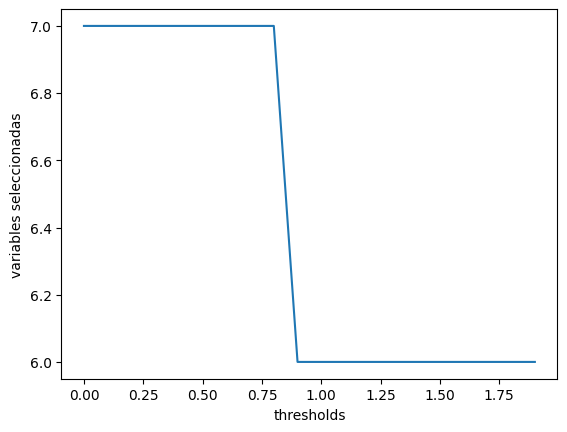

In [103]:
import matplotlib.pyplot as plt
thresholds = np.arange(0,2,0.1)
vars = [VarianceThreshold(threshold=th).fit_transform(X_num_tr).shape[1] for th in thresholds]
plt.plot(thresholds, vars)
plt.xlabel('thresholds')
plt.ylabel('variables seleccionadas')
#La cantidad de variables va decayendo en función del umbral hasta que llega un punto donde es independiente

In [104]:
indices = vt.get_support()
indices

array([ True,  True,  True,  True,  True,  True,  True])

In [109]:
idx = np.where(vt.get_support()==True)[0]
X_test_tr = X_num_test.iloc[:,idx]

In [110]:
X_test_tr

,P1_2,P1_2_A,P1_3,P1_7,EDAD,P13_6,P13_8
63964,2,4,5,6,70,20.0,15.0
82155,1,2,4,2,26,16.0,25.0
46912,3,5,8,3,27,17.0,23.0
80942,1,3,8,4,59,23.0,15.0
70257,2,4,20,3,56,22.0,20.0
...,...,...,...,...,...,...,...
57015,1,3,3,3,77,20.0,20.0
97248,2,2,6,2,71,17.0,17.0
27553,3,10,12,4,60,22.0,16.0
19574,1,1,2,5,26,15.0,15.0


In [112]:
classifier = RandomForestClassifier(random_state = 100)
classifier.fit(X_num_tr, y_train)
preds = classifier.predict(X_test_tr)
accuracy_score(preds, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


0.7380401044489333

## Linear Discriminant Analysis para las variables numéricas

In [113]:
lda = LinearDiscriminantAnalysis()
steps = [('lda', lda), ('m', LogisticRegression(C=10))]
model_lda = Pipeline(steps=steps)
cv = StratifiedKFold(n_splits=5)
n_scores_lda = cross_val_score(model_lda, X_cat_train, y_train, scoring='f1_macro', cv=cv, n_jobs=-1)

In [114]:
model = LogisticRegression(C=10)
n_scores = cross_val_score(model, X_cat_train, y_train, scoring='f1_macro', cv=cv, n_jobs=-1)

In [ ]:
print(np.mean(n_scores_lda))
print(np.mean(n_scores))

## Chi-squared para las variable categóricas

In [115]:
X_chi2 = X_cat_train.apply(LabelEncoder().fit_transform)
y_chi2 = LabelEncoder().fit_transform(y_train)
fs = SelectKBest(score_func=chi2, k=10)
X_kbest = fs.fit_transform(X_chi2, y_chi2)

In [116]:
X_kbest.shape

(81184, 10)

In [117]:
fs.get_feature_names_out()

array(['P1_5', 'P1_6', 'PAREN', 'NIV', 'P2_10', 'P2_11', 'P3_1', 'P13_1',
       'P13_4', 'P13_5'], dtype=object)

## Método de Envoltura

### **Backward elimination**

In [119]:
#Librerías:
import pandas as pd
import seaborn as sns
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import VarianceThreshold

In [120]:
df.head()

,COD_RES,P1_1,P1_2,P1_2_A,P1_3,P1_4_1,P1_4_2,P1_4_3,P1_4_4,P1_4_5,...,P4_12_5,P4_12_6,P4_12_7,P13_1,P13_4,P13_5,P13_6,P13_7,P13_8,victima_violencia
0,True,True,2,5,10,True,True,True,True,True,...,True,True,True,True,0.0,1.0,18.0,True,21.0,False
1,True,True,2,5,8,True,True,True,True,True,...,True,True,True,True,1.0,1.0,24.0,True,22.0,True
2,True,True,3,4,12,True,True,True,True,True,...,True,True,True,True,0.0,1.0,25.0,True,24.0,False
3,True,True,3,7,17,True,True,True,True,True,...,True,True,True,False,0.0,1.0,23.0,True,21.0,False
4,True,True,4,5,6,True,True,True,True,True,...,True,True,True,True,1.0,1.0,19.0,True,18.0,True


In [238]:
nombres_columnas = ['P1_5', 'P1_6', 'PAREN', 'NIV', 'P2_10', 'P2_11', 'P3_1', 'P13_1',
                    'P13_4', 'P13_5', 'P1_2', 'P1_2_A', 'P1_3', 'P1_7', 'EDAD', 'P13_6', 'P13_8', 'victima_violencia']

nuevo_dataframe = df[nombres_columnas]

In [123]:
nuevo_dataframe.head()

,P1_5,P1_6,PAREN,NIV,P2_10,P2_11,P3_1,P13_1,P13_4,P13_5,P1_2,P1_2_A,P1_3,P1_7,EDAD,P13_6,P13_8,victima_violencia
0,1,1,2,10.0,3.0,2.0,5,True,0.0,1.0,2,5,10,3,32,18.0,21.0,False
1,1,1,2,2.0,3.0,2.0,5,True,1.0,1.0,2,5,8,3,74,24.0,22.0,True
2,1,1,8,7.0,3.0,2.0,4,True,0.0,1.0,3,4,12,6,70,25.0,24.0,False
3,1,1,3,10.0,3.0,2.0,6,False,0.0,1.0,3,7,17,3,24,23.0,21.0,False
4,1,1,2,2.0,3.0,2.0,2,True,1.0,1.0,4,5,6,6,61,19.0,18.0,True


In [124]:
X = nuevo_dataframe.drop(columns = "victima_violencia")
y = nuevo_dataframe["victima_violencia"]

In [125]:
nuevo_dataframe.dtypes

P1_5                 category
P1_6                 category
PAREN                category
NIV                  category
P2_10                category
P2_11                category
P3_1                 category
P13_1                    bool
P13_4                category
P13_5                category
P1_2                    int64
P1_2_A                  int64
P1_3                    int64
P1_7                    int64
EDAD                    int64
P13_6                 float64
P13_8                 float64
victima_violencia        bool
dtype: object

In [ ]:
X.shape

(101481, 23)

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1234)

In [127]:
backward_feature_selection = SequentialFeatureSelector(RandomForestClassifier(n_jobs = -1),
                                                       k_features = 5,
                                                       forward = False,
                                                       floating = False,
                                                       verbose = 2,
                                                       scoring = "accuracy",
                                                       cv = 4)

In [128]:
backward_feature_selection = backward_feature_selection.fit(X_train, y_train)


[2024-03-13 00:20:55] Features: 16/5 -- score: 0.7683780055183287
[2024-03-13 00:28:49] Features: 15/5 -- score: 0.7689938904217579
[2024-03-13 00:35:57] Features: 14/5 -- score: 0.7677128498226252
[2024-03-13 00:42:34] Features: 13/5 -- score: 0.7678729798975168
[2024-03-13 00:48:51] Features: 12/5 -- score: 0.7672570949940876
[2024-03-13 00:54:45] Features: 11/5 -- score: 0.7669984233346472
[2024-03-13 01:00:14] Features: 10/5 -- score: 0.7643131651556957
[2024-03-13 01:05:13] Features: 9/5 -- score: 0.7626379582183682
[2024-03-13 01:08:54] Features: 8/5 -- score: 0.7619481671265275
[2024-03-13 01:12:20] Features: 7/5 -- score: 0.7546068190776508
[2024-03-13 01:15:14] Features: 6/5 -- score: 0.7438657863618447
[2024-03-13 01:17:41] Features: 5/5 -- score: 0.7321516554986204

In [ ]:
backward_feature_selection.subsets_

In [130]:
backward_feature_selection.k_feature_idx_

(6, 12, 13, 15, 16)

In [131]:
data_new = backward_feature_selection.k_feature_names_
data_new

('P3_1', 'P1_3', 'P1_7', 'P13_6', 'P13_8')

In [132]:
backward_feature_selection.k_score_

0.7321516554986204

#### Comparación

En general, estas 2 clases de métodos a pesar de tener el mismo objetivo presentaron diferencias considerables en su implementación y en los resultados de ellos. El método de filtrado fue claro en su implementación, basándose en la comparación de una medida estadística (en este caso la varianza), para asignarle una puntuación a cada variable donde sea fácil de ver la razón por la que cada variable fue eliminada, además de que la función fue rápida de implementar. Por otra parte, el método de envoltura funcionó como caja negra, tan solo regresando las variables seleccionadas y la puntuación del modelo sin una razón clara del por qué cada variable fue eliminada, solo dejando a inferir que esas variables llevaron a una mejor validación. Este método ayuda más a escoger variables que podrían estar sin correlación por si solas, pero con significancia una vez se toman en cuenta otras variables, pero a la vez resultó ser demasiado costosa para Google Colab, pasando horas para que el método pudiera ser completado.

En cuanto a resultados de estos 2 métodos, a pesar de abordar el problema de selección de características de manera distinta, llegaron a conclusiones similares. Las características escogidas por el método de filtrado contienen en su lista todas las que fueron seleccionadas por la caja negra del método de envoltura. Además, el método de filtrado nos dio un mayor score que el método de envoltura. El no existir variables que estén en el método de filtrado que estén en el de envoltura nos dice que no existen variables que necesiten de otras para ser útiles, así como por el menor score del método de envoltura nos dice que el modelo terminó eliminando características que si eran relevantes para el modelo.

Finalmente, se realizaron 2 medidas estadísticas extra: la selección chi-cuadrado, y el LDA (análisis discriminante lineal por sus siglas en inglés).  El método de selección chi-cuadrado dio las características que nos darían el mayor resultado en la prueba chi-cuadrado, en este caso por cual nos daría el mejor valor de k. Este método dio resultados muy distintos a los del método de envoltura, pero más similares a los de filtrado, lo que podría reafirmar que el método de filtrado fue el más eficiente. Por otro lado, utilizamos el método LDA combinado con regresión logística para evaluar el rendimiento de los datos. El modelo resultó en una puntuación de 0.93 y 0.96 respectivamente, por lo que se puede asumir que los datos tienen una muy buena correlación.

## Modelo

In [219]:
seleccionadas = ['P3_1', 'P1_3', 'P1_7', 'P13_6', 'P13_8', 'victima_violencia']
ultimate_df = df[seleccionadas]

<ipython-input-239-768a24c09175>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = ultimate_df.corr()


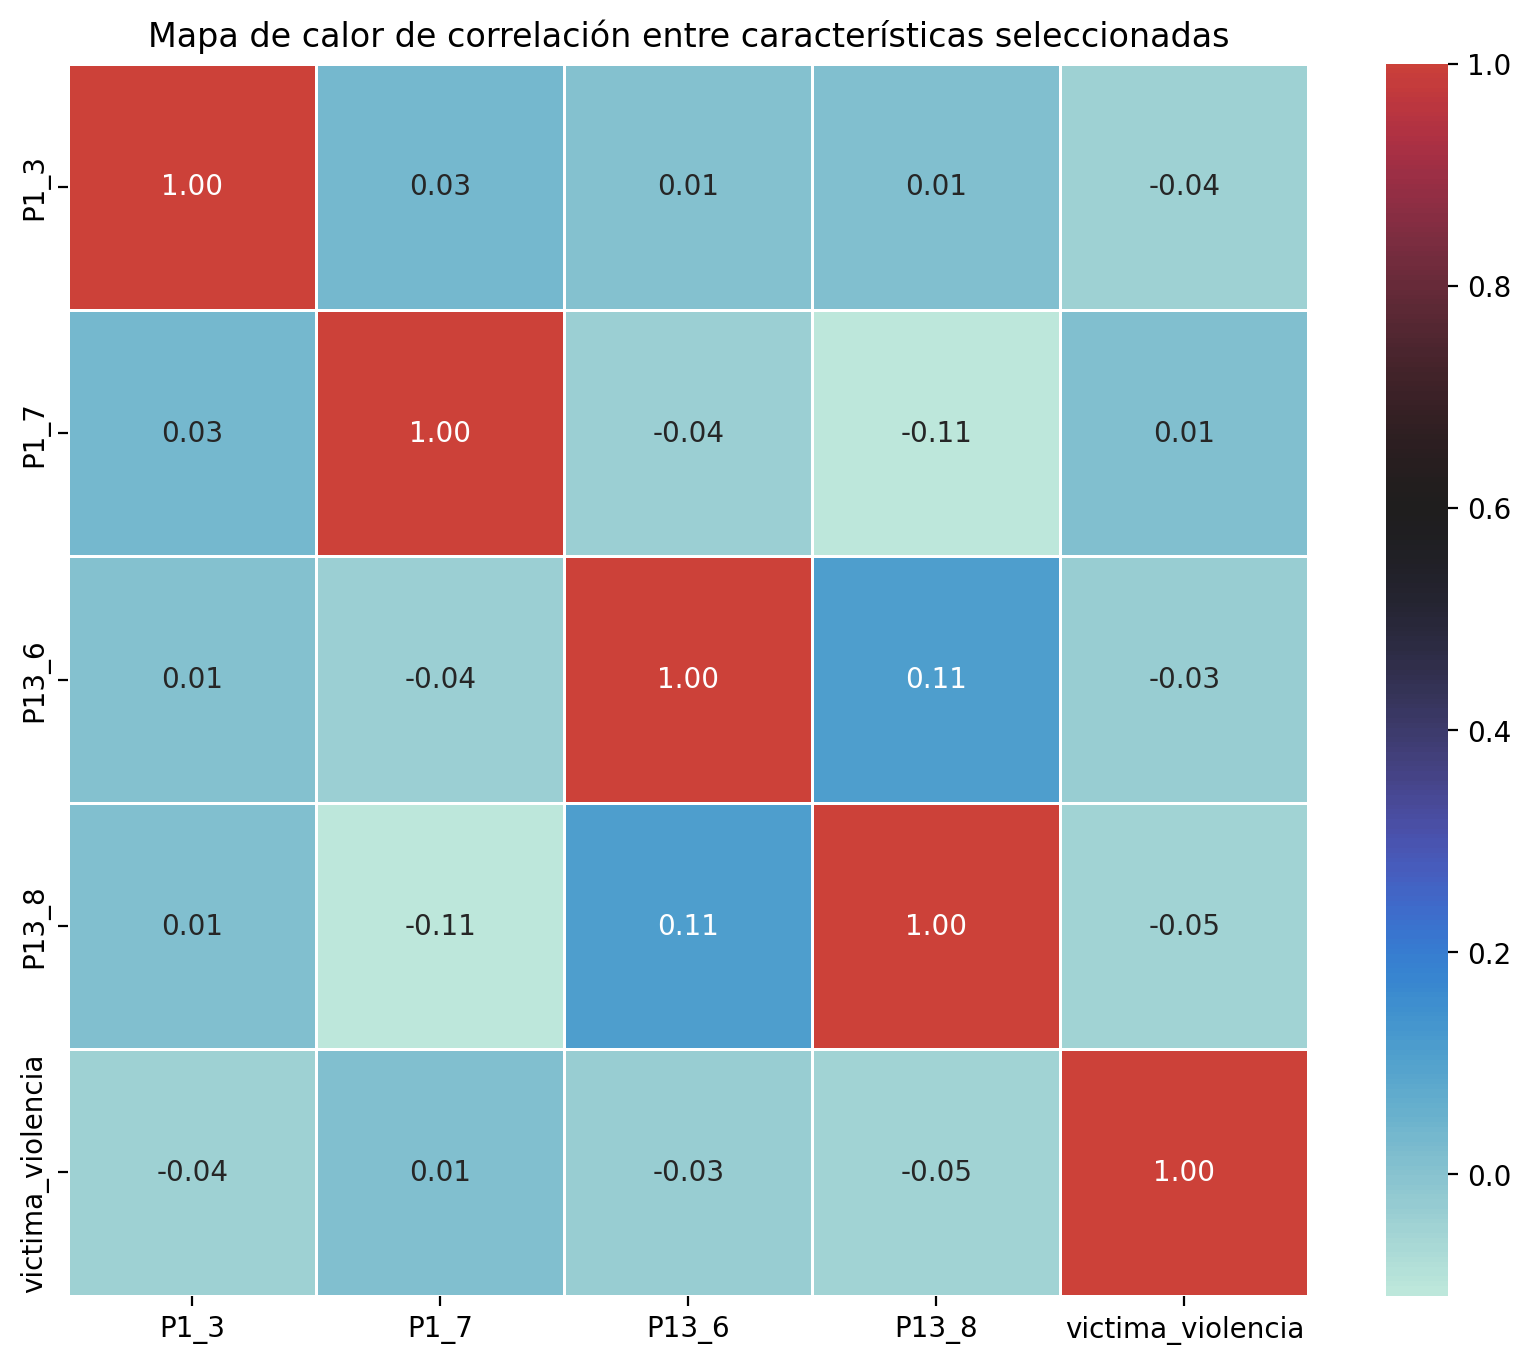

In [239]:
correlation_matrix = ultimate_df.corr()

# Crear un mapa de calor de la matriz de correlación
plt.figure(figsize=(10, 8), dpi=200)
sns.heatmap(correlation_matrix, annot=True, center = 0.6, fmt=".2f", linewidths=0.5)
plt.title("Mapa de calor de correlación entre características seleccionadas")
plt.show()


In [221]:
X = ultimate_df.drop(columns = "victima_violencia")
y = ultimate_df["victima_violencia"]

In [222]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1234)

In [223]:
model = RandomForestClassifier()

In [224]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [225]:
y_pred = model.predict(X_test)

Text(0.5, 1.0, 'Matriz de confusión de violencia de pareja RF')

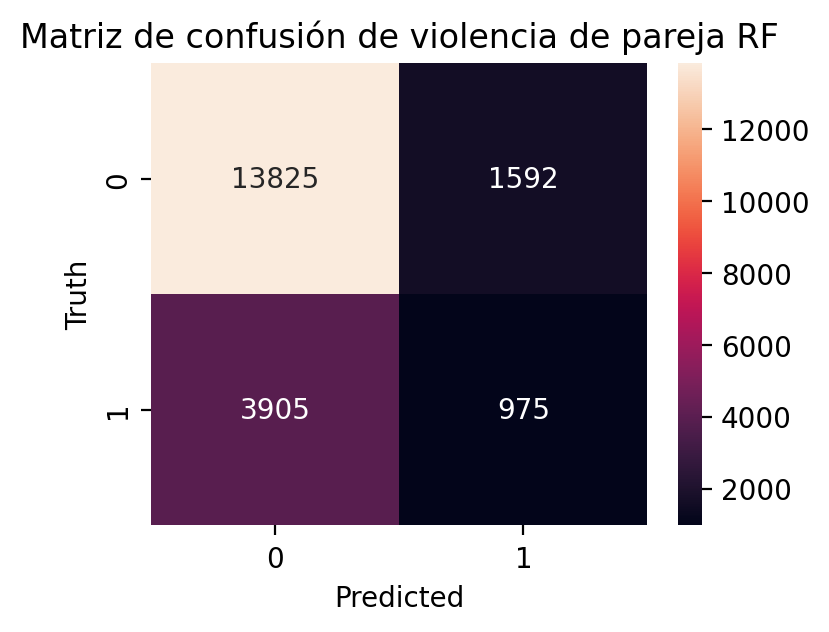

In [240]:
cm_rf = tf.math.confusion_matrix(labels=y_test, predictions= y_pred)

plt.figure(figsize = (4, 3),  dpi=200)
sns.heatmap(cm_rf, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Matriz de confusión de violencia de pareja RF')

In [227]:
accuracy = accuracy_score(y_test,y_pred)

In [229]:
accuracy.round(4)

0.7292


## ADA BOOST

### Modeling

In [230]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(n_estimators=100)

In [231]:
model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100)

###  Evaluation

In [235]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
predictions_ada = model.predict(X_test)

In [236]:
Class_report = classification_report(y_test, predictions_ada)
print(Class_report)

              precision    recall  f1-score   support

       False       0.78      0.97      0.86     15417
        True       0.56      0.12      0.19      4880

    accuracy                           0.77     20297
   macro avg       0.67      0.54      0.53     20297
weighted avg       0.73      0.77      0.70     20297



Text(0.5, 1.0, 'Matriz de confusión de violencia de pareja AdaBoost')

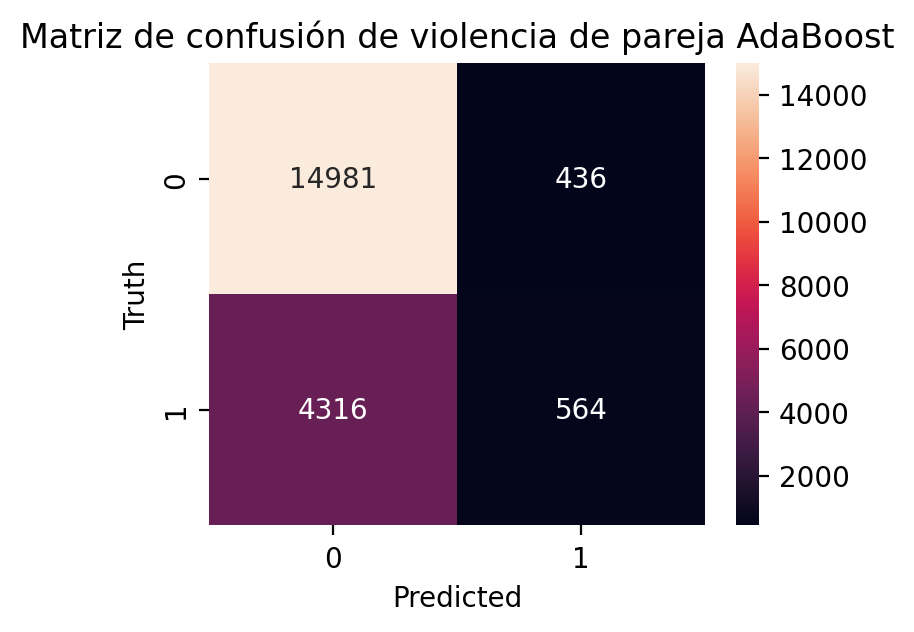

In [241]:
cm_ada = tf.math.confusion_matrix(labels=y_test, predictions = predictions_ada)

plt.figure(figsize = (4, 3),  dpi=200)
sns.heatmap(cm_ada, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Matriz de confusión de violencia de pareja AdaBoost')